# Machine Learning Portfolio 1

In [6]:
# Packages
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install missingno
#!pip install scikit-learn
#!pip install imbalanced-learn
#!pip install xgboost
#!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [7]:
#libraries inladen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from imblearn.combine import SMOTETomek
from sklearn.impute import KNNImputer
from imblearn.under_sampling import RandomUnderSampler
## dataframes inladen
SEED = 1337
test_df = pd.read_csv('test_c.csv')
train_df = pd.read_csv('train_c.csv')
display(test_df.head())
display(train_df.head())

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,1,85,66,29,0,26.6,0.351,31
1,4,0,137,40,35,168,43.1,2.288,33
2,13,1,189,60,23,846,30.1,0.398,59
3,14,5,166,72,19,175,25.8,0.587,51
4,20,3,126,88,41,235,39.3,0.704,27


,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,668,6,98,58,33,190,34.0,0.430,43,0
1,324,2,112,75,32,0,35.7,0.148,21,0
2,624,2,108,64,0,0,30.8,0.158,21,0
3,690,8,107,80,0,0,24.6,0.856,34,0
4,473,7,136,90,0,0,29.9,0.210,50,0


In [9]:
##functie defineren om accuracy te pakken
def get_clf_stats(y_test, pred=None, pred_proba=None):
    """ Dit functie geeft de accuracy, precision, recall, f1 scores en een confusion matrix terug van de y_test en pred.
    
    Parameters:
    -----------
    y_test: Series, the y_test series from the train_test_split.
    
    pred: Series, the predictions on the X_test.
    
    pred_proba: Array, the prediction probability on the X_test.
    
    Returns:
    --------
    print: each score will be printed.
    
    confusion: the confusion matrix.
    """
    
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)   
     
    roc_auc = roc_auc_score(y_test, pred_proba)

    # ROC-AUC print 
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    return confusion


## opdracht 1: EDA

In [10]:
display(test_df.info())
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   p_id                      154 non-null    int64  
 1   Pregnancies               154 non-null    int64  
 2   Glucose                   154 non-null    int64  
 3   BloodPressure             154 non-null    int64  
 4   SkinThickness             154 non-null    int64  
 5   Insulin                   154 non-null    int64  
 6   BMI                       154 non-null    float64
 7   DiabetesPedigreeFunction  154 non-null    float64
 8   Age                       154 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 11.0 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   p_id                      614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
 9   Outcome                   614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


None

### alle waardes zijn numeriek

In [11]:
def highlight_min(s, props=''):
    """Dit functie highlight het laagste waarde van elk kolom.
    Maak gebruik van DataFrame.style.apply().
    
    Parameters:
    -----------
    s: DataFrame, the dataframe to highlight on.
    
    props: str, the color and background color.
    
    Returns:
    np.where(s == np.nanmin(s.values), props, ''): the DataFrame with highlights.
    --------
    
    """
    return np.where(s == np.nanmin(s.values), props, '')

train_df.describe().style.apply(highlight_min, props='color:Black;background-color:Grey', axis=0)

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.542345,3.809446,120.465798,68.903909,20.456026,81.250814,31.929642,0.468096,33.265472,0.342020
std,222.135103,3.375544,31.959619,19.933385,16.063105,116.947384,8.136791,0.329203,11.851427,0.474773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,194.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.238000,24.000000,0.000000
50%,380.500000,3.000000,115.000000,72.000000,23.000000,27.000000,32.150000,0.365500,29.000000,0.000000
75%,583.750000,6.000000,140.000000,80.000000,32.000000,130.000000,36.500000,0.628500,41.000000,1.000000
max,767.000000,15.000000,197.000000,114.000000,99.000000,744.000000,67.100000,2.420000,72.000000,1.000000


In [5]:
train_df.isna().sum()

p_id                        0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### er zitten geen nans in de data dus het is geschikt voor machine learning

In [12]:
x_cols = train_df.columns[1:9]
x_cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

p_id                       -0.085877
Pregnancies                 0.222939
Glucose                     0.475325
BloodPressure               0.082771
SkinThickness               0.078982
Insulin                     0.124408
BMI                         0.272149
DiabetesPedigreeFunction    0.182245
Age                         0.233461
Outcome                     1.000000
Name: Outcome, dtype: float64


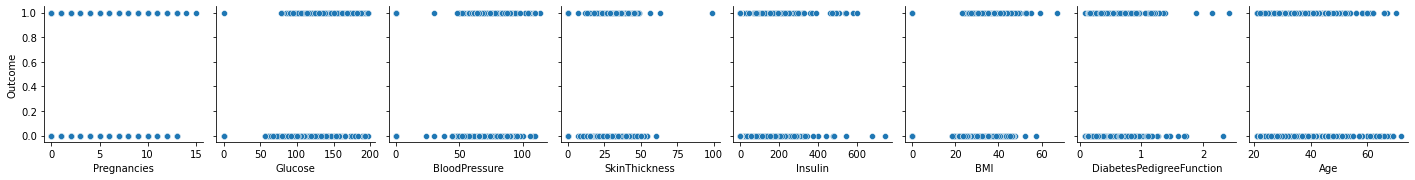

In [13]:
## relaties tussen variabelen laten zien
X = train_df[x_cols]
y = train_df['Outcome']

print(train_df.corr()['Outcome'])
fig = sns.pairplot(
    train_df,
    x_vars=x_cols,
    y_vars='Outcome'
)
plt.show()

## onderzoeken of we moeten standaardiseren en of er outliers in de data  zitten

In [14]:
feature_names = [cname for cname in train_df.loc[:,:'Age'].columns]

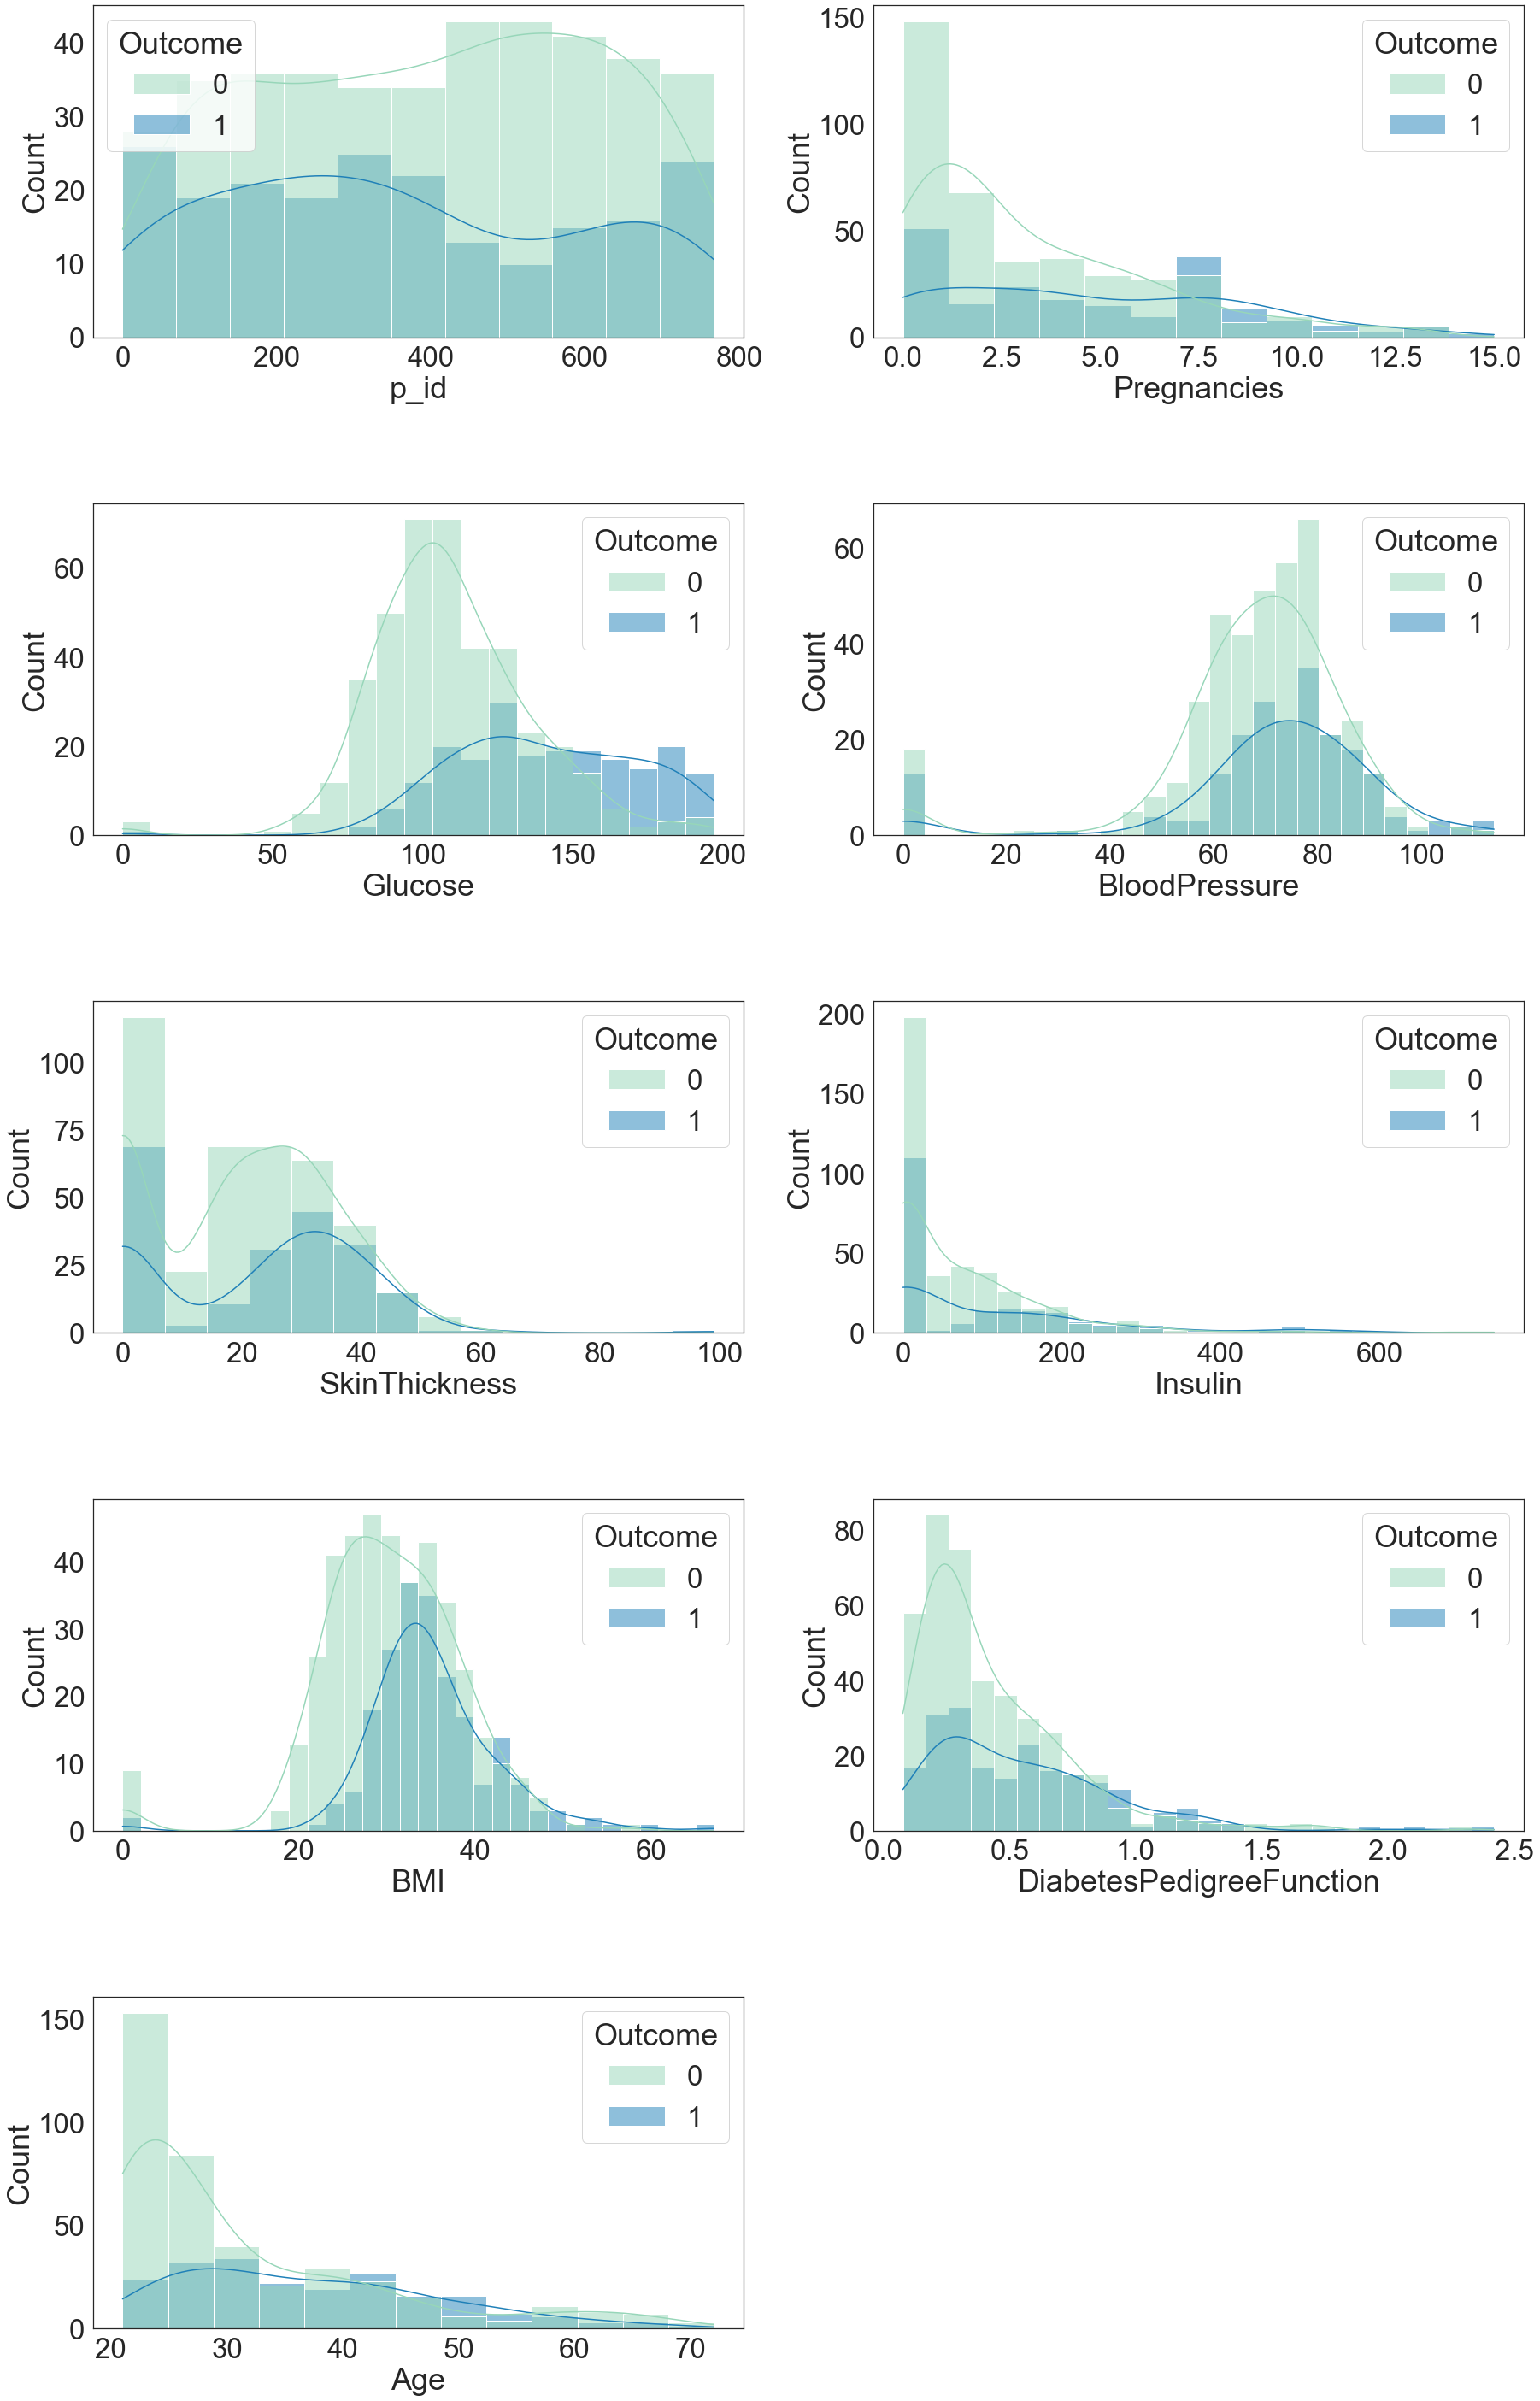

In [15]:
rcParams['figure.figsize'] = 30,50
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=train_df, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

### het is een goed idee om te standaardiseren omdat de data veel verschillende meetniveaus heeft. Ook hebben sommige datapunten veel nul waardes die daar niet horen.

In [16]:
## nul waardes uit de desbetreffende features vervangen met nan
train_df[['Glucose','BloodPressure','SkinThickness','BMI']] = train_df[['Glucose',
                                                                                 'BloodPressure','SkinThickness','BMI']].replace(0, np.NaN)

Features waar de nul waardes vervangen zijn met NaN zijn:
- Glucose
- BloodPressure
- SkinThickness
- BMI

We hebben de nul waardes van Insulin niet vervangen, omdat de feature een waarde aangeeft van een 2 hour serum insulin. Als de persoon geen serum insulin heeft genomen, dan is het waarde 0.

In [17]:
## alle nans imputen
imputer = KNNImputer(n_neighbors=3, weights='uniform')
imputed = imputer.fit_transform(train_df)
train_df_imp = pd.DataFrame(imputed, columns=train_df.columns)
train_df_imp

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,668.0,6.0,98.0,58.0,33.000000,190.0,34.0,0.430,43.0,0.0
1,324.0,2.0,112.0,75.0,32.000000,0.0,35.7,0.148,21.0,0.0
2,624.0,2.0,108.0,64.0,23.333333,0.0,30.8,0.158,21.0,0.0
3,690.0,8.0,107.0,80.0,22.666667,0.0,24.6,0.856,34.0,0.0
4,473.0,7.0,136.0,90.0,36.000000,0.0,29.9,0.210,50.0,0.0
...,...,...,...,...,...,...,...,...,...,...
609,384.0,1.0,125.0,70.0,24.000000,110.0,24.3,0.221,25.0,0.0
610,224.0,1.0,100.0,66.0,15.000000,56.0,23.6,0.666,26.0,0.0
611,729.0,2.0,92.0,52.0,27.333333,0.0,30.1,0.141,22.0,0.0
612,630.0,7.0,114.0,64.0,25.000000,0.0,27.4,0.732,34.0,1.0


In [18]:
feature_names = [cname for cname in train_df.loc[:,:'Age'].columns]

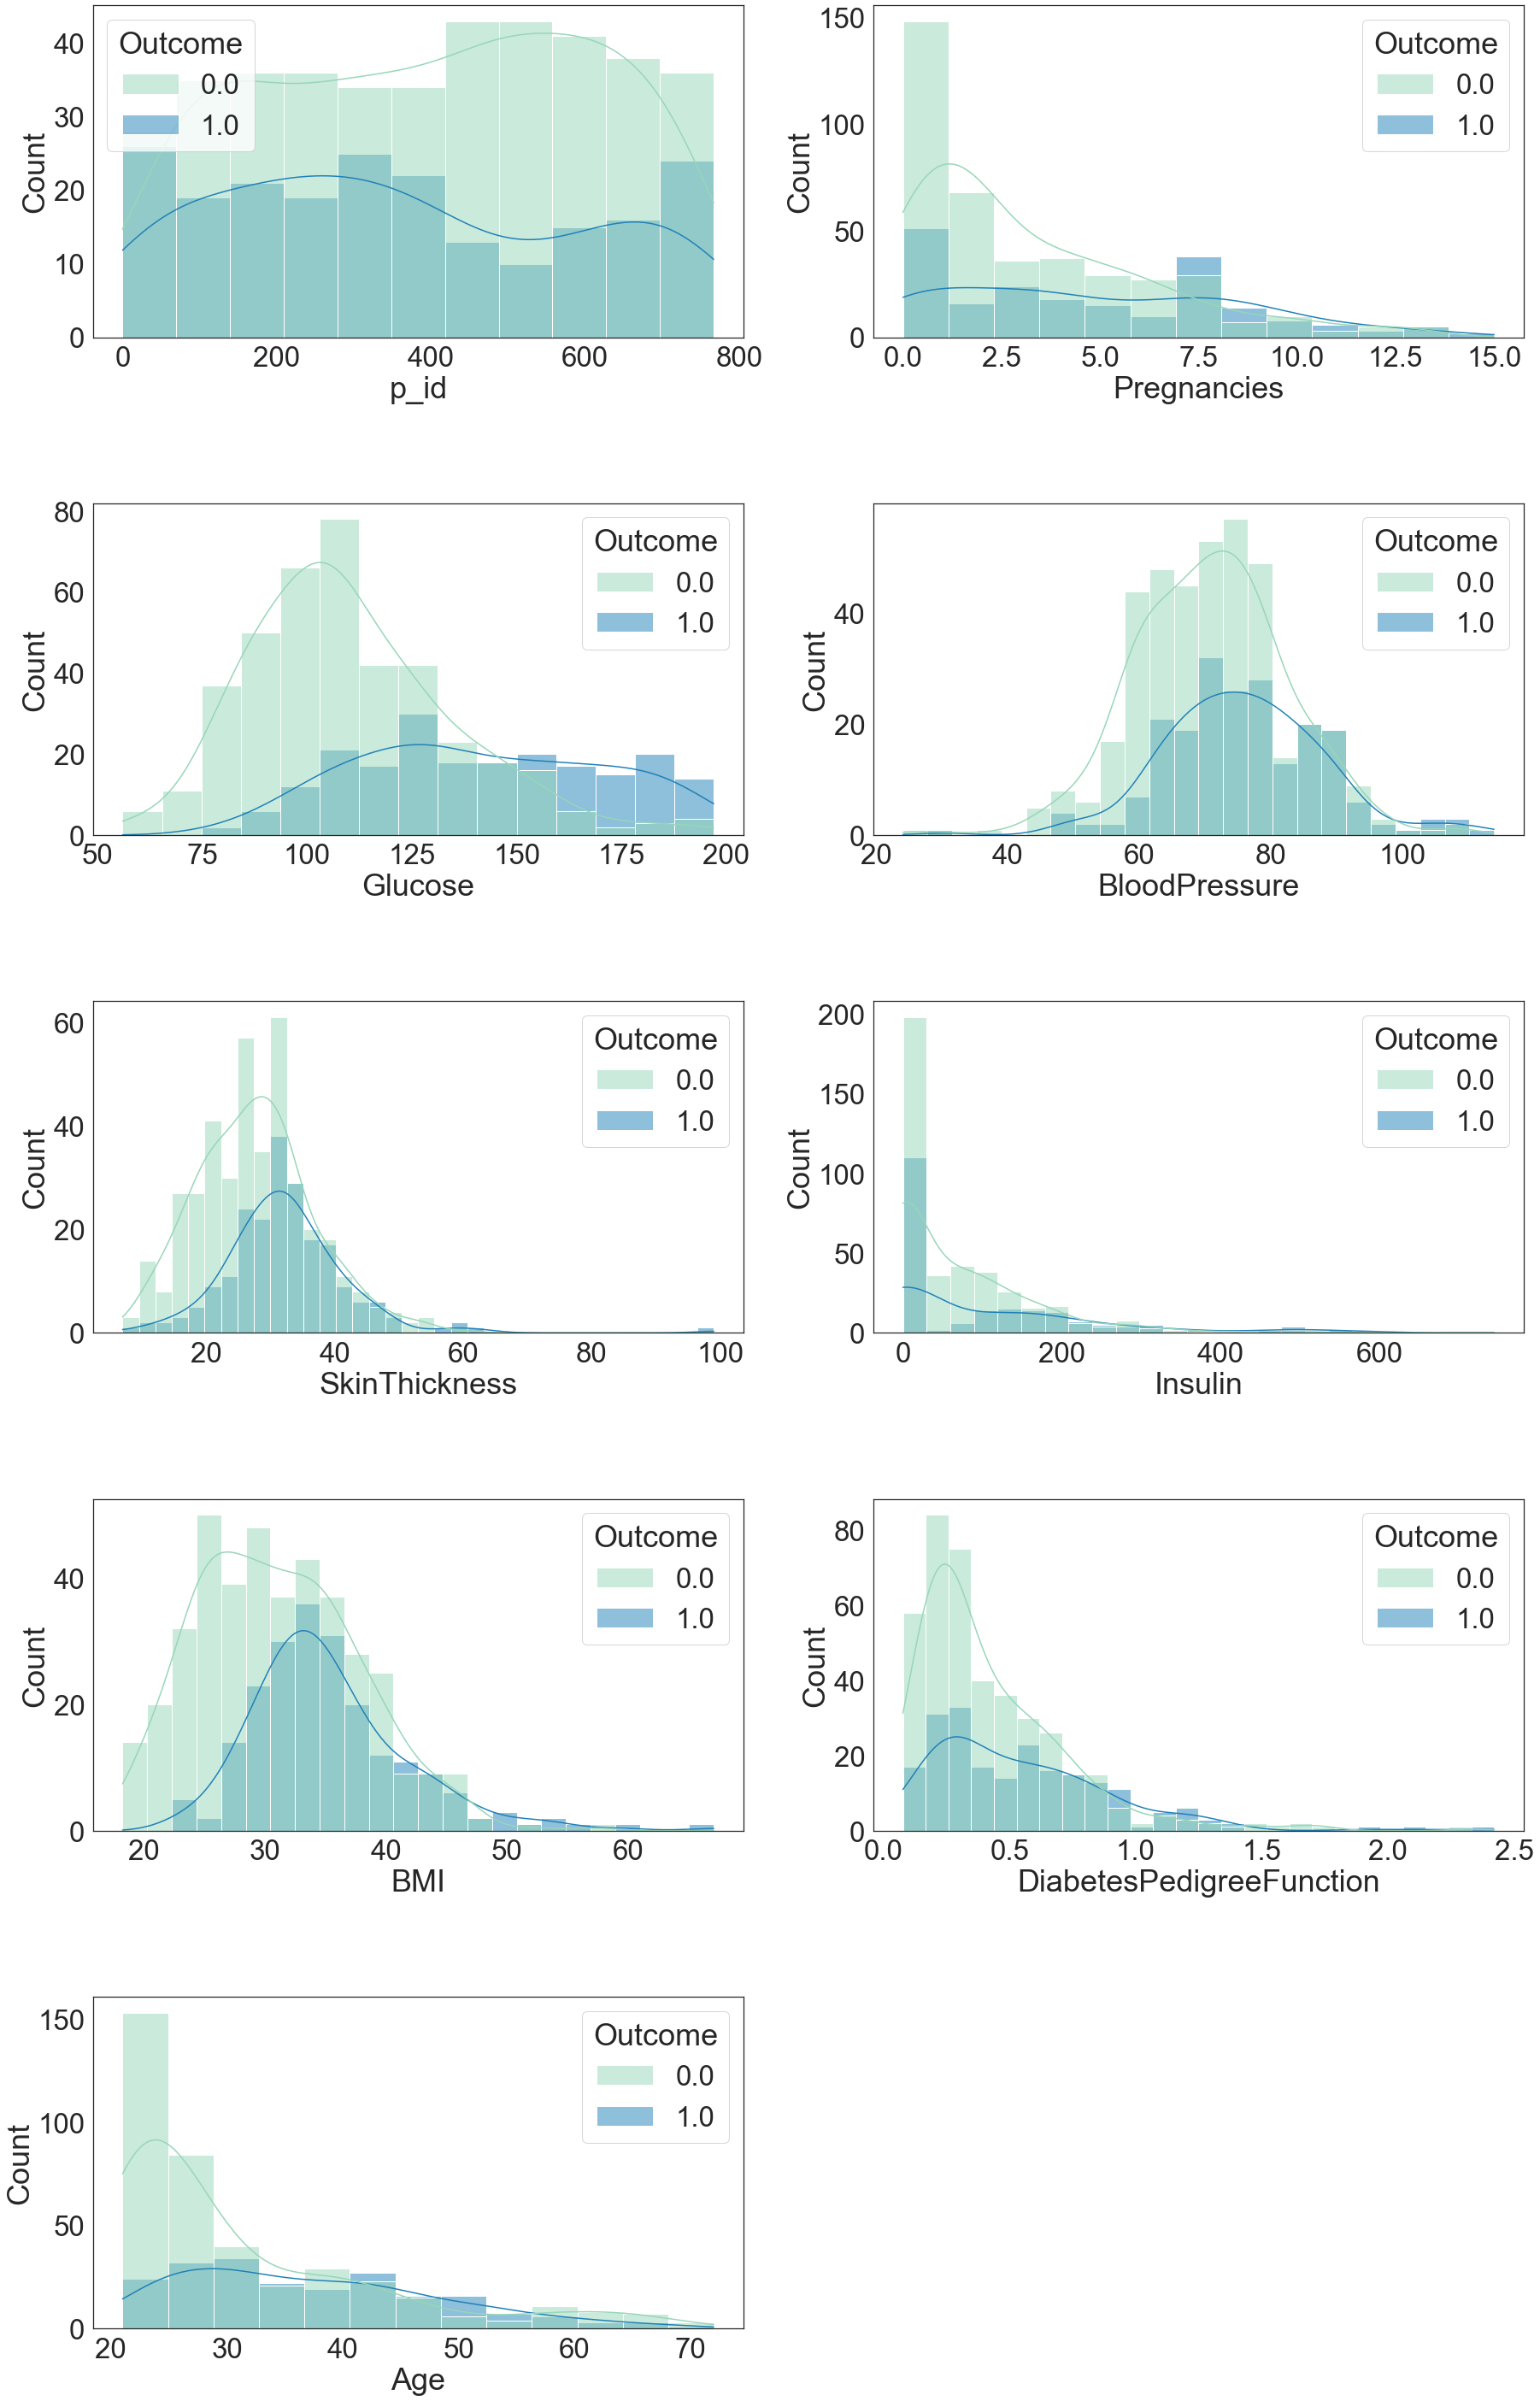

In [19]:
rcParams['figure.figsize'] = 30,50
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=train_df_imp, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

In [20]:
## standaardiseren van de data
x_cols = train_df.columns[1:9]
scale = StandardScaler()
scaled_data = scale.fit_transform(train_df_imp[x_cols])
scaled_data_df = pd.DataFrame(scaled_data)
scaled_data_df.head()
train_df_imp['Pregnancies'] = scaled_data_df[0]
train_df_imp['Glucose'] = scaled_data_df[1]
train_df_imp['BloodPressure'] = scaled_data_df[2]
train_df_imp['SkinThickness'] = scaled_data_df[3]
train_df_imp['Insulin'] = scaled_data_df[4]
train_df_imp['BMI'] = scaled_data_df[5]
train_df_imp['DiabetesPedigreeFunction'] = scaled_data_df[6]
train_df_imp['Age'] = scaled_data_df[7]

<AxesSubplot:>

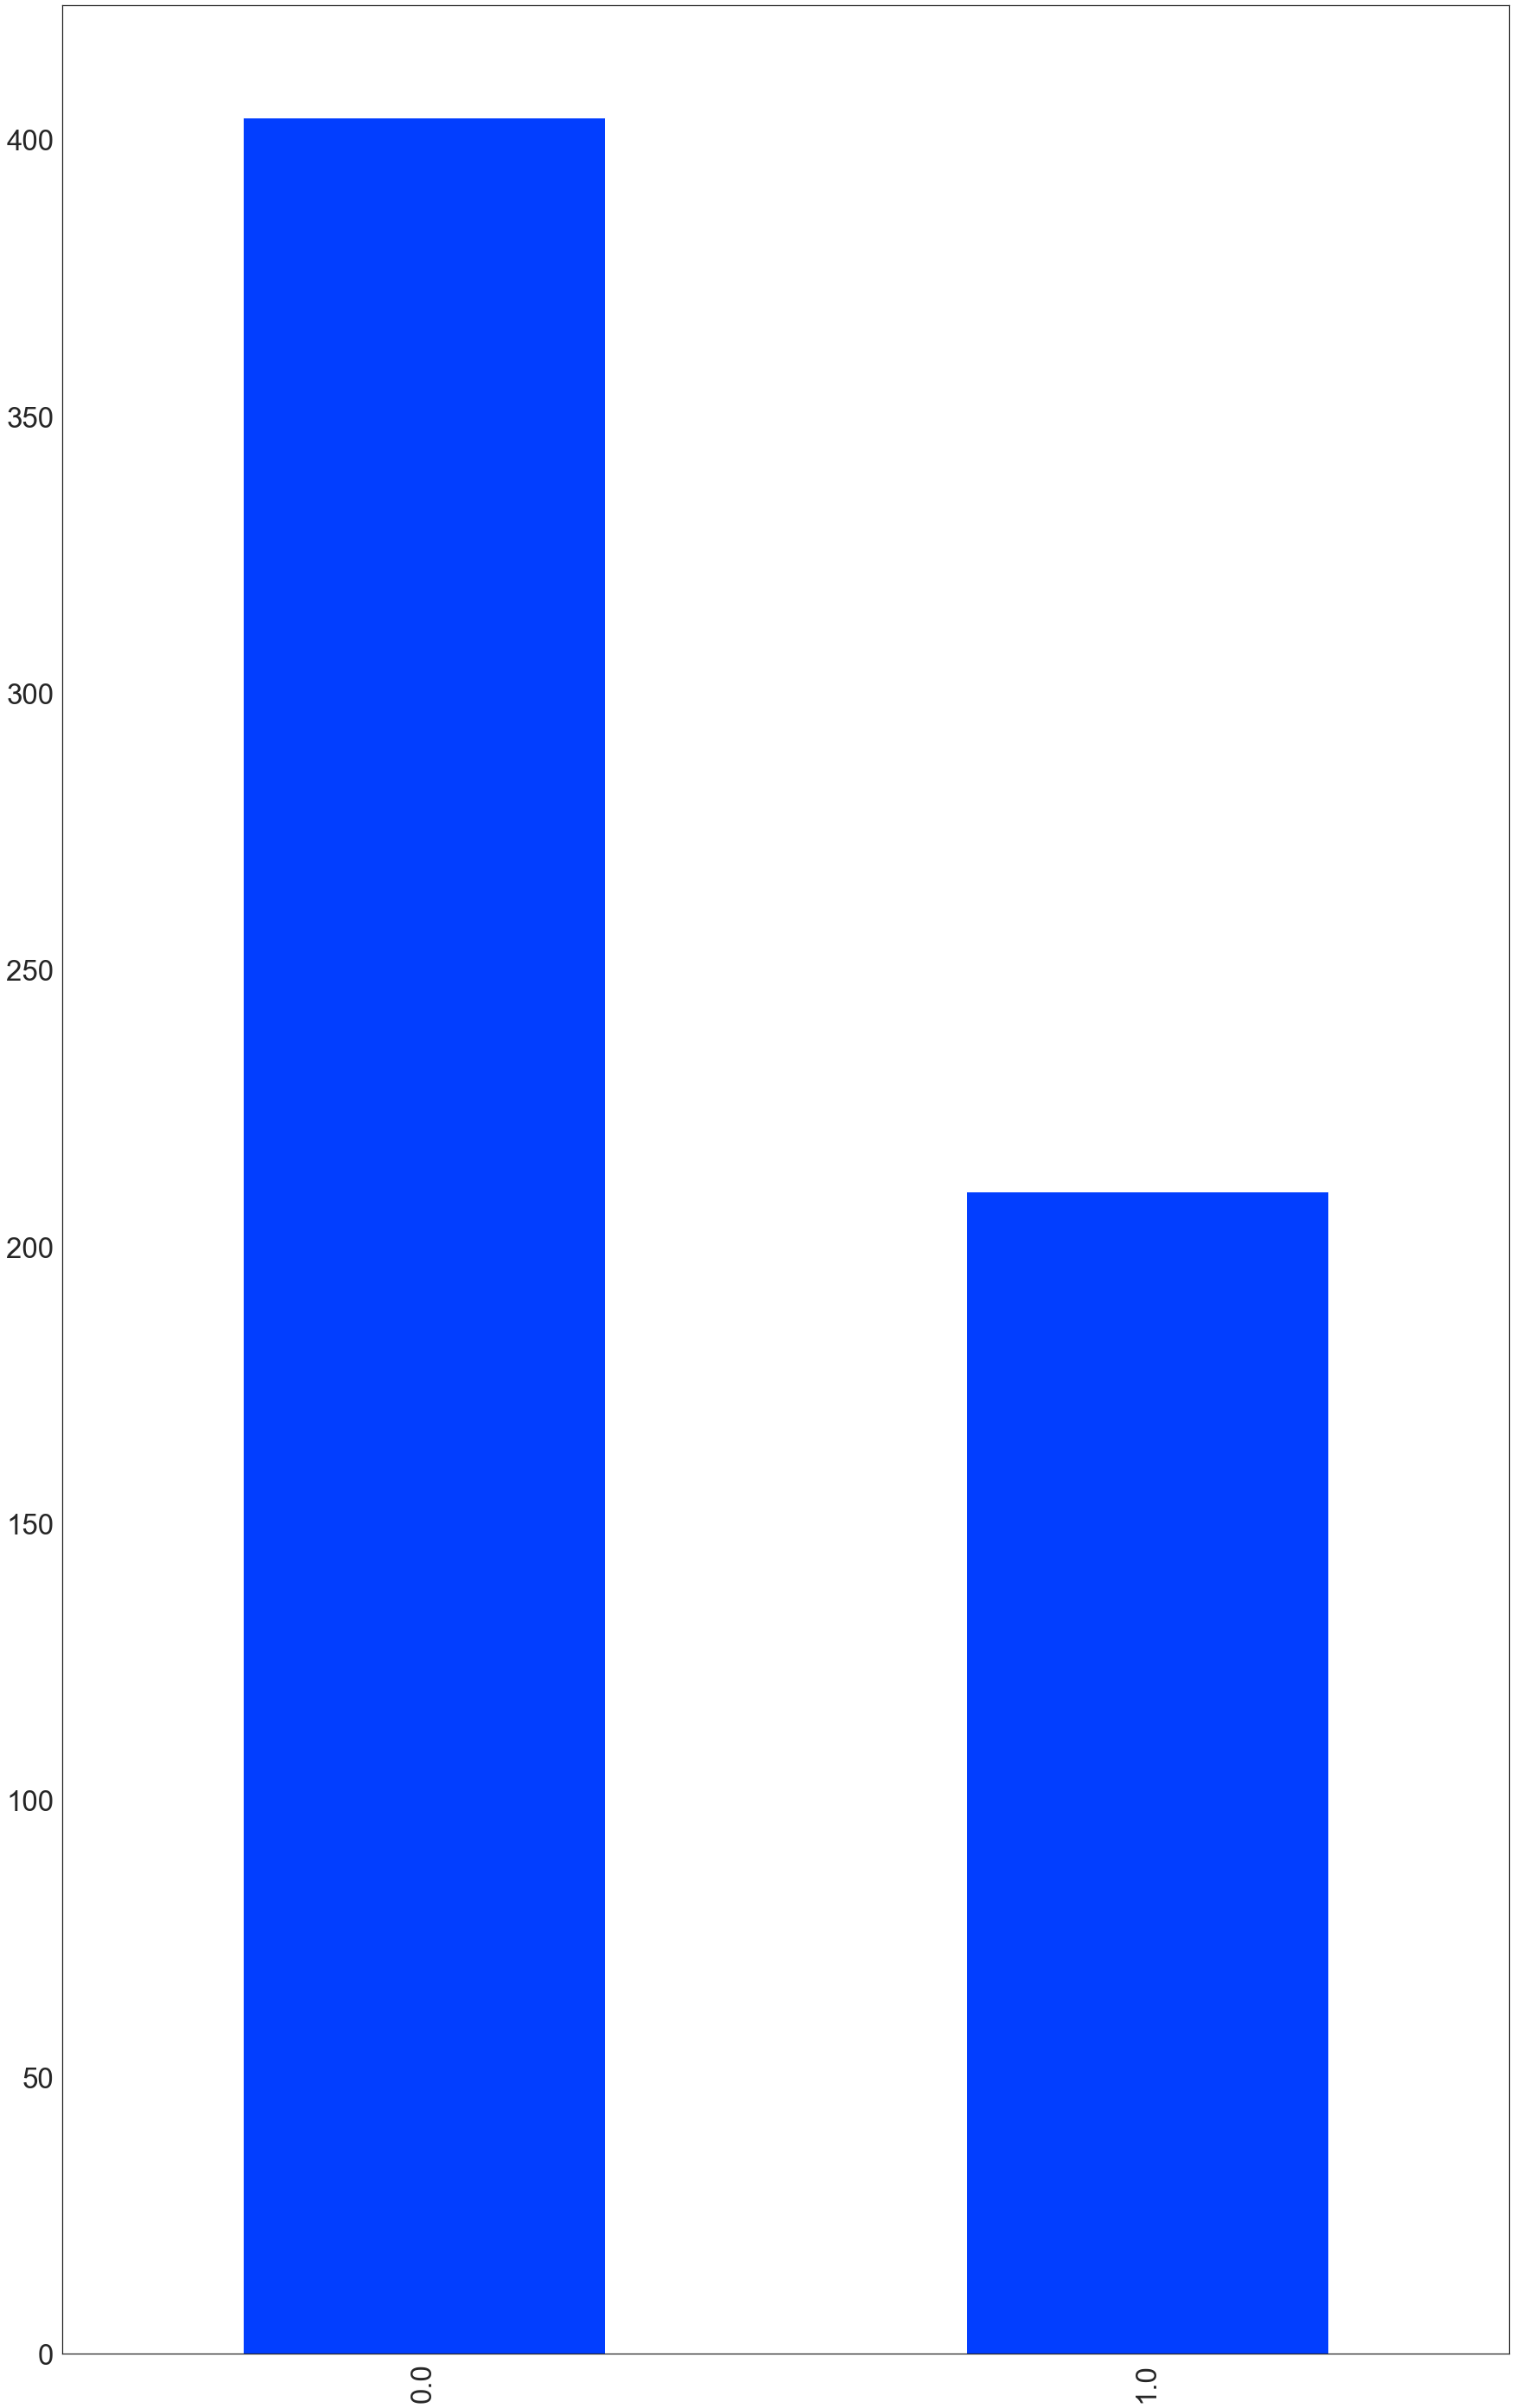

In [21]:
train_df_imp['Outcome'].value_counts().plot(kind='bar')

mensen met diabetes worden ondergerepresenteerd in de data. We gaan wat synthethische data toevoegen om overfitting te vermijden.

In [43]:
##X en y maken voor models en data klaarmakenx
X = train_df_imp[x_cols]
y = train_df_imp['Outcome']

C:\Users\samke\AppData\Roaming\Python\Python39\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


<AxesSubplot:>

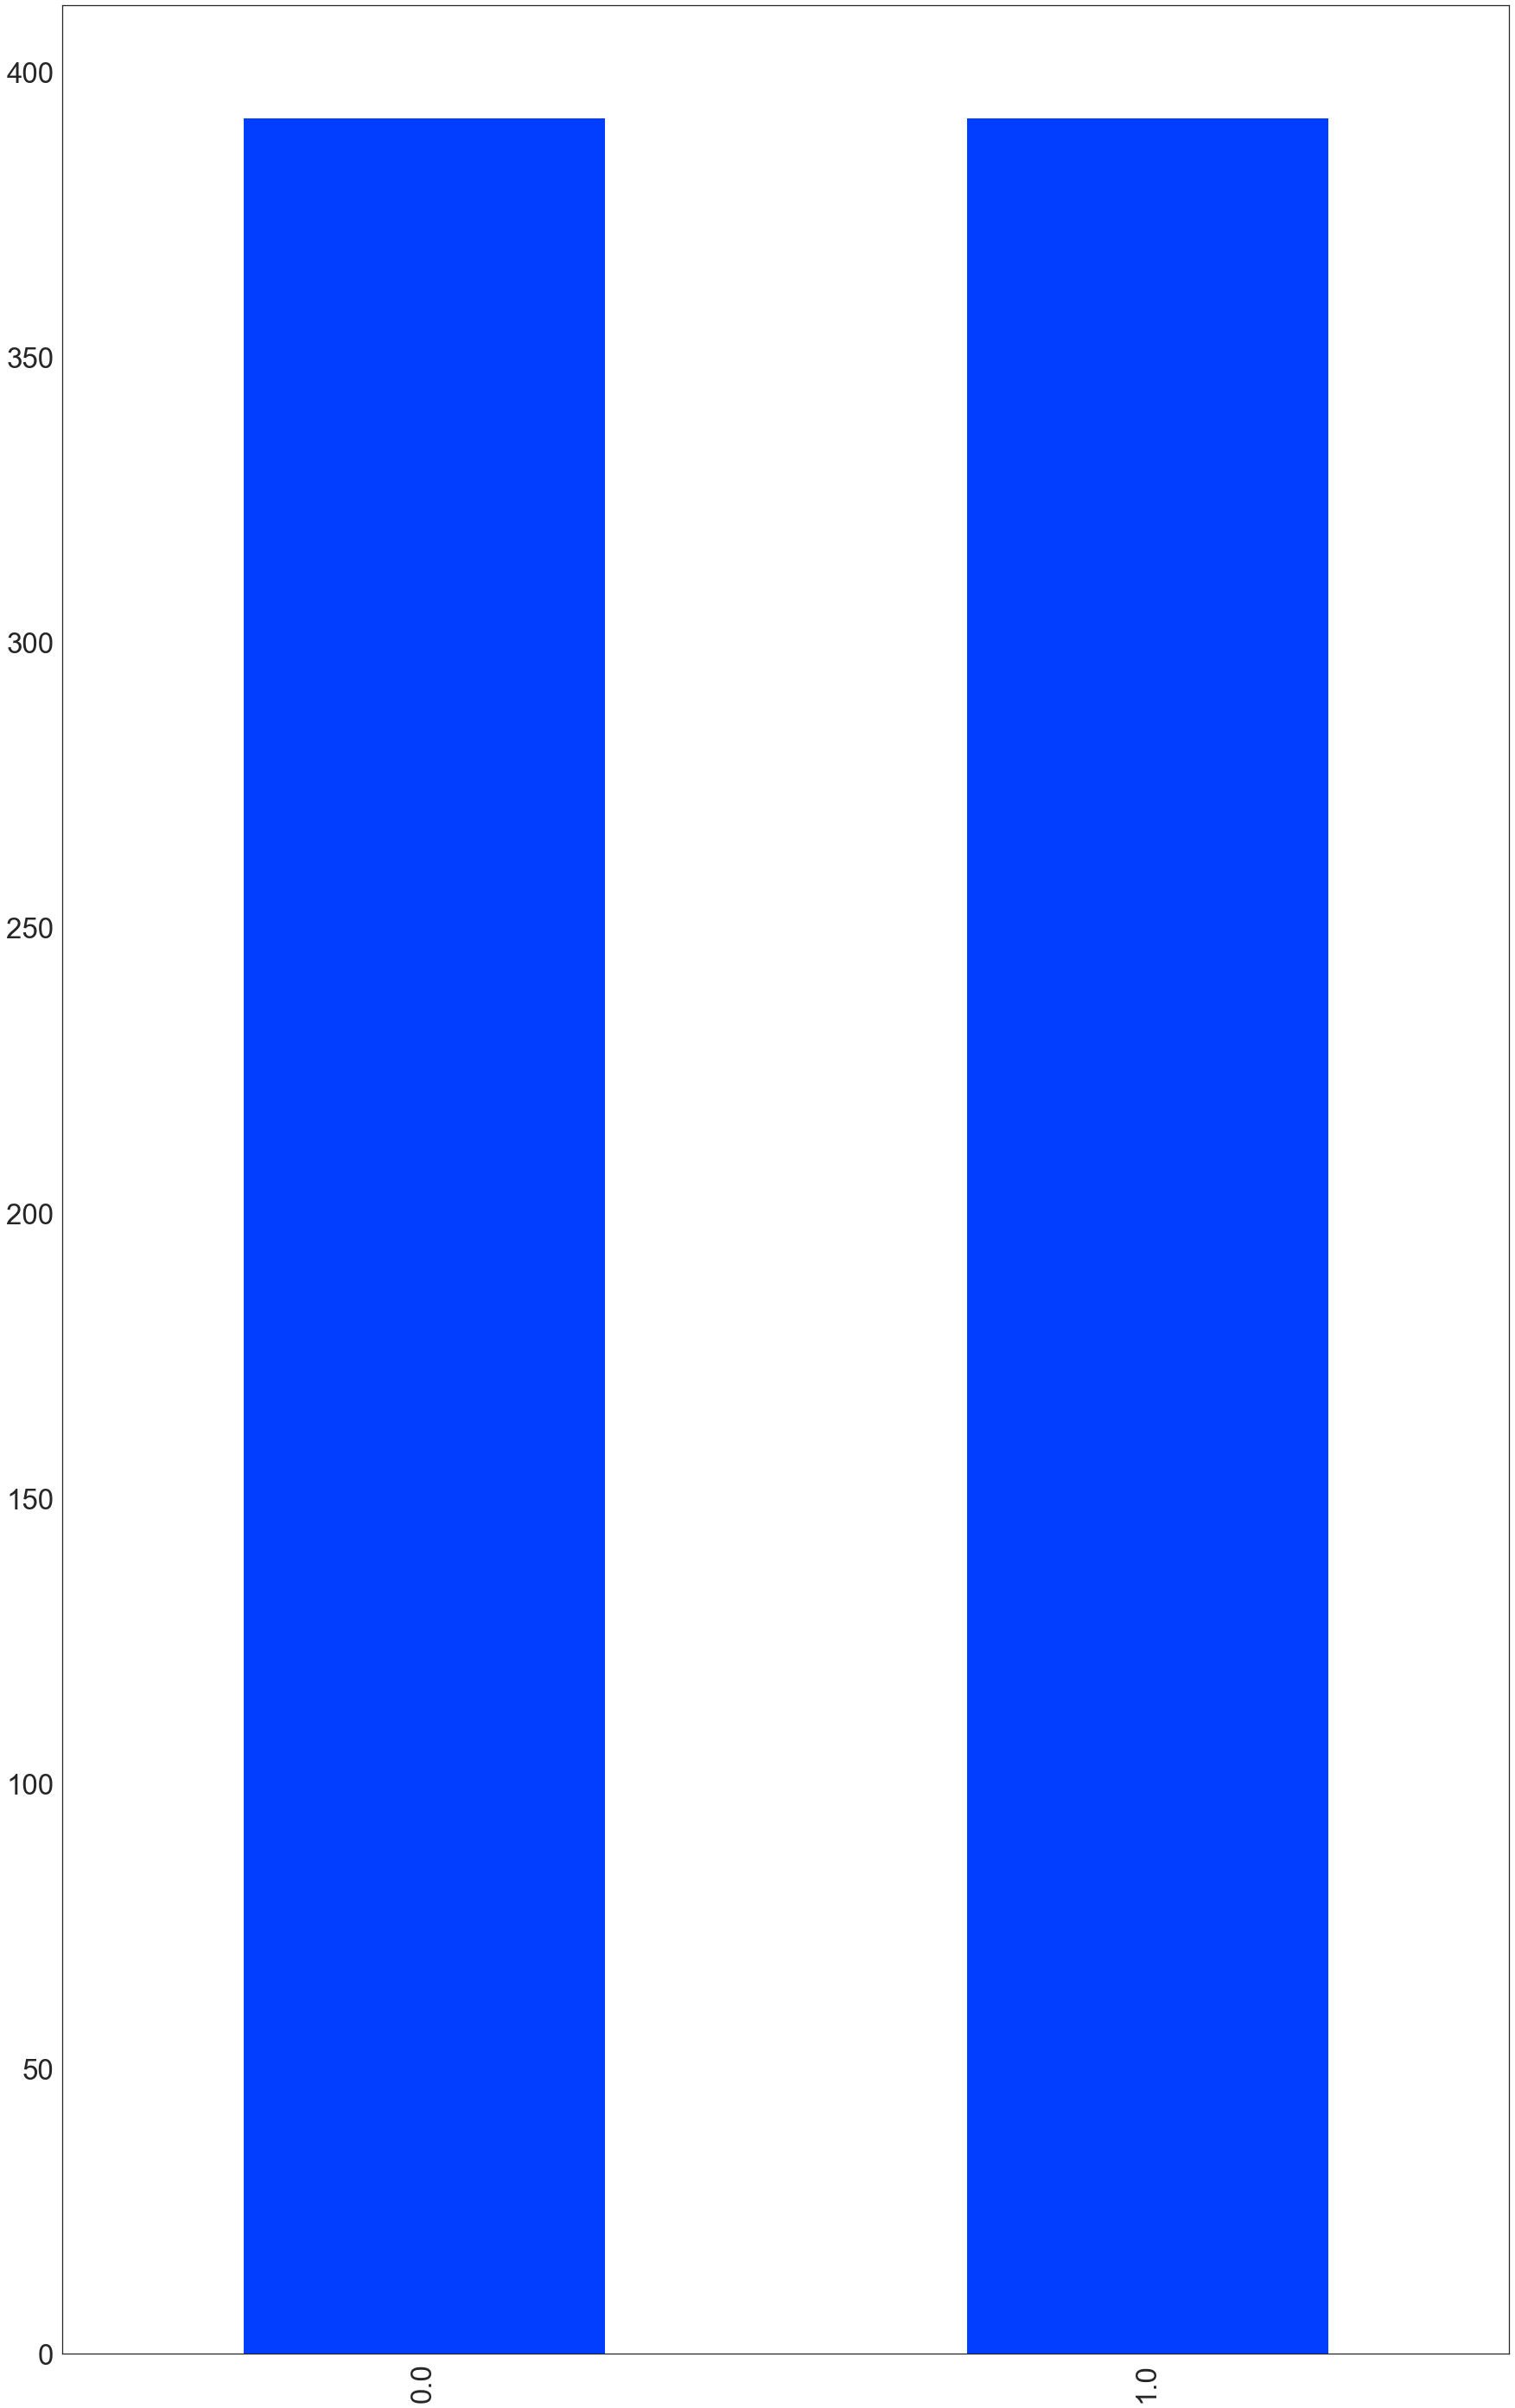

In [44]:
smote = SMOTETomek(sampling_strategy='auto', random_state=SEED, n_jobs=3)
X_sm, y_sm = smote.fit_resample(X, y)

df_model = pd.DataFrame(X_sm, columns=x_cols)
df_model['Outcome'] = y_sm

df_model['Outcome'].value_counts().plot(kind='bar')

### feature engineering

In [61]:
train_df = df_model

In [62]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

train_df["NewBMI"] = NewBMI

train_df.loc[train_df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]

train_df.loc[(train_df["BMI"] > 18.5) & (train_df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
train_df.loc[(train_df["BMI"] > 24.9) & (train_df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
train_df.loc[(train_df["BMI"] > 29.9) & (train_df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
train_df.loc[(train_df["BMI"] > 34.9) & (train_df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
train_df.loc[train_df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [63]:
def set_insulin(row):
    """Dit functie geeft normaal of abnormaal terug afhankelijk van hoe groot de waarde is.
    
    Parameters:
    -----------
    row: Series, nieuwe kolom die gevuld wordt met normaal of abnormaal.
    
    Returns:
    "Normaal"
    "Abnormaal"
    """
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [64]:
train_df["NewInsulinScore"] = train_df.apply(set_insulin, axis=1)

In [65]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")

train_df["NewGlucose"] = NewGlucose

train_df.loc[train_df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]

train_df.loc[(train_df["Glucose"] > 70) & (train_df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]

train_df.loc[(train_df["Glucose"] > 99) & (train_df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]

train_df.loc[train_df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [73]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.649477,-0.756224,-1.203030,0.399137,0.930657,0.219967,-0.115817,0.822050,0.0,0,0,0,0,1,1,0,0,0
1,-0.536483,-0.297246,0.202315,0.294361,-0.695330,0.465758,-0.973130,-1.035780,0.0,0,0,0,0,1,1,0,0,0
2,-0.536483,-0.428382,-0.707026,-0.613693,-0.695330,-0.242699,-0.942728,-1.035780,0.0,0,0,0,0,1,1,0,0,0
3,1.242458,-0.461167,0.615652,-0.683544,-0.695330,-1.139113,1.179273,0.062029,0.0,0,0,0,0,1,1,0,0,0
4,0.945967,0.489572,1.442326,0.713463,-0.695330,-0.372823,-0.784642,1.413178,0.0,0,0,0,0,1,1,0,0,0


In [72]:
train_df = pd.get_dummies(train_df, columns=['NewBMI', 'NewInsulinScore', 'NewGlucose'], drop_first=True)

KeyError: "None of [Index(['NewBMI', 'NewInsulinScore', 'NewGlucose'], dtype='object')] are in the [columns]"

In [68]:
set(train_df['NewGlucose'])

KeyError: 'NewGlucose'

In [69]:
train_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0
mean,0.063688,0.158662,0.054383,0.078178,0.036609,0.079029,0.032652,0.076642,0.500000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
std,1.024679,1.009974,1.001130,1.032623,0.984107,0.963310,0.947664,0.988815,0.500319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-1.129463,-2.133156,-4.013722,-2.325027,-0.695330,-2.064445,-1.185938,-1.035780,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
25%,-0.832973,-0.595637,-0.624359,-0.543843,-0.695330,-0.546323,-0.675486,-0.697993,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
50%,-0.239993,0.030595,0.028777,0.084810,-0.378691,0.046468,-0.240461,-0.250708,0.500000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
75%,0.746281,0.821980,0.651852,0.608688,0.502765,0.595883,0.559089,0.718263,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
max,3.317888,2.489403,3.426343,7.314322,5.123991,5.005666,5.934017,3.271008,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [74]:
cat_df = train_df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'Insulin','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [75]:
concat_df = df_model.drop('Outcome', axis=1)

In [83]:
X_df = pd.concat([concat_df, cat_df], axis=1)

In [84]:
X_df = X_df.drop(['NewBMI','NewInsulinScore','NewGlucose'], axis=1)
X_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,Insulin,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.649477,-0.756224,-1.203030,0.399137,0.930657,0.219967,-0.115817,0.822050,0,0,0,0,1,0.930657,1,0,0,0
1,-0.536483,-0.297246,0.202315,0.294361,-0.695330,0.465758,-0.973130,-1.035780,0,0,0,0,1,-0.695330,1,0,0,0
2,-0.536483,-0.428382,-0.707026,-0.613693,-0.695330,-0.242699,-0.942728,-1.035780,0,0,0,0,1,-0.695330,1,0,0,0
3,1.242458,-0.461167,0.615652,-0.683544,-0.695330,-1.139113,1.179273,0.062029,0,0,0,0,1,-0.695330,1,0,0,0
4,0.945967,0.489572,1.442326,0.713463,-0.695330,-0.372823,-0.784642,1.413178,0,0,0,0,1,-0.695330,1,0,0,0


#### Conclusie EDA

# opdracht 2: Evaluatie

- De vorm van machine learning die we hier gebruiken is supervised learning. Er worden namelijk test sets gebruikt om een model te trainen
- We hebben met deze opdracht te maken met een classificatie probleem. bij dit soort problemen hebben we een aantal metrics om modellen te evalueren

De belangerijkste metrics zijn deze:
- Accuracy: Deze metric geeft aan hoe veel van de voorspellingen juist zijn
- precision: Deze metric word gebruikt om te meten hoe veel "true positives" je hebt ten opzichte van "false negatives"
- recall: Deze metric meet hoe veel positieve waardes daadwerkelijk positief zijn
- f1-score: Deze metric is het gemiddelde van precision en recall
- de eerder genoemde false positives en negatives zijn uit te beelden in een "confusion matrix" Deze laat zien of je voorspelling juist zijn en hoe de verdeling is tussen goede en slechte voorspellingen
- ook laat deze confusion matrix zien waar je model beter in is

Wij willen een zo hoog mogelijke recall score omdat we "false negatives" willen minimaliseren. False negatives geeft aan dat er voorspelt wordt dat de patiënt geen diabetes heeft, terwijl hij eigenlijk wel heeft. Dus we willen zo min mogelijk false negatives hebben, en dat geeft ons een hogere recall score.

[Confusion Matrix](https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5)
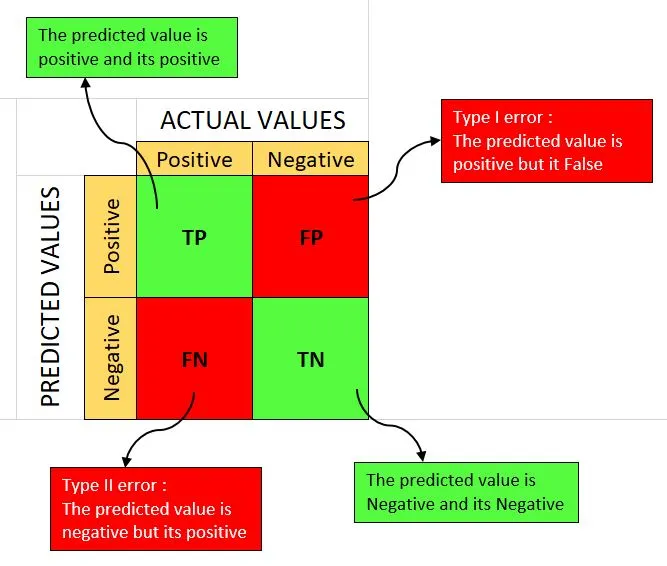

$$Precision\space{} = \frac{TP}{(TP + FP)}$$<br>
$$Recall\space{} = \frac{TP}{(TP + FN)}$$<br>
$$F1\space{}score\space{} = \frac{2 * Precision * Recall}{Precision + Recall}$$<br>
$$Accuracy\space{} = \frac{Number\space{} of\space{} correct predictions}{Total\space{} number\space{} of\space{} predictions}$$

## opdracht 3: modelleren

In [85]:
##x en y maken voor modellen
X = X_df
y = df_model['Outcome']

#### Logistic Regression

Een logistische regressie model is een model waarbij je via features kan voorspellen wat de variabel hoort te zijn, mits de variabel dichotoom (binair zoals in dit project wel of geen diabetes) is. De logistische regressie lijkt veel op de lineaire regressie, je probeert namelijk bij een logistische regressie de uitkomst te transformeren zodat je er zelfde soort uitvoering kan toepassen als bij een lineaire regressie. Een logistische regressie heeft wel minder voorwaarden. Hoewel de variabel waar je de uitkomst van wil weten dichotoom moet zijn, modelleert de logistische regressie niet de dichotome maar het modelleert de kans van die uitkomst. Een kans ligt altijd tussen de 0 en 1 maar bij een lineaire regressie kan dat niet want hier moeten de waardes continu zijn. Daarom gebruiken we iets anders dan de kans en dat is de relatieve kans. Dit doen we omdat de relatieve kans van 0 tot eindig kan lopen, alleen is hier nog wel een laatste probleem en dat is dat uitkomst niet onder de 0 kan zitten. Hiervoor is het laatste trucje en dat is in plaats van de relatieve kans te gebruiken gebruiken we de natuurlijke logaritme van de relatieve kans, ook wel logit genoemd. Hierdoor kunnen de waarden alles zijn. De formule voor een logistische regressie zijn er als volgt uit:(Logistische regressie - Wikistatistiek, z.d.)  

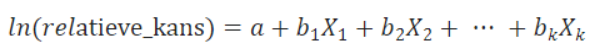

Hierbij is de logit(ln(relatieve_kans)) de uitkomst variabele, a is de constante (oftewel het beginpunt), zijn de X_i  (i = 1,2,…,k) de relativerende waardes van de variabelen bij de desbetreffende uitkomst variabel en de b_i (i = 1,2,…,k) zijn de logistische regressiecoëfficiënten van de desbetreffende variabelen. (Logistische regressie - Wikistatistiek, z.d.)

#### Loss functie:

Een loss functie is een maatstaf voor de hoeveelheid fouten dat je model maakt, er zijn veel verschillende soorten loss functies voor verschillende vormen van machine learning. De loss functie voor logistische regressie is de ‘log loss’. De functie van de log loss ziet er als volgt uit:

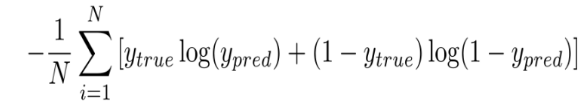

Hierbij is y_true de werkelijke waarden en dus dichotoom (bijvoorbeeld 0 of 1, positief of negatief), y_pred is berekende kans doormiddel van de features en dus een waarde tussen 0 en 1. (Slides - Loss, metrics, underfitting, overfitting - V. Radhakrishnan)

#### Gradient Descent:

Nadat je een logistische regressie hebt uitgevoerd wil je natuurlijk de functie optimaliseren of te wel dingen van een functie aanpassen om een zo goed mogelijke ‘output’ te krijgen. Denk bijvoorbeeld aan het beste gewicht mee trainen om zo groot mogelijke spieren te krijgen. Je hebt de zogenaamde optimale waarde van een functie vaak bij de minimale of de maximale waarde. Bij deze minimale of maximale waarde is de ‘gradiënt’ ten opzichte van de parameters 0. Of te wel optimaliseren houdt eigenlijk in dat je de waarden van de parameters moet vinden waarbij de gradiënt van de functie zo dicht mogelijk bij nul (of als het mogelijk is 0 is). We lichten gradient descent nog wat extra uit met een voorbeeld:(StatQuest with Josh Starmer, 2019)

Wij hebben 3 verschillende data punten, [2,5] [4,6] [5,8], en hier willen we een lijn op ‘fitten’, de functie hiervoor is y= a * x + b, we gaan via gradient descent de optimale waardes voor b proberen te vinden. We zullen hier een a waarden van 0.75 gebruiken. We voeren eerst een willekeurig cijfer in voor b in zodat gradient descent iets heeft om te verbeteren. De functie is dan 0.75 * x + 0. Dan zullen we nu de verschillen uitrekenen tussen de echte y en de voorspelde y, verschillen= echte y – voorspelde y. Dit doen we voor al de 3 punten. 0.75 * 2 = 1.5, 0,75 * 4 = 3 en 0,75 * 5 = 3,75. Verschillen zijn 5- 1.5 = 3.5, 6-3 = 3 en 8-3.75 = 4.25. Hier nemen we de som van de kwadraten van dus 3,5^2 + 3^2 + 4.25^2 = 12,3 + 9 + 18,1 = 39,4. We moeten dit getal zo dicht mogelijk naar de 0 brengen. We beginnen met de som van de kwadraten van de verschillen in 1 functie te zetten de functie ziet er zo uit: (5 - (b + 0.75 *2))^2 + (6 - (b + 0.75 *4))^2 + (8 - (b + 0.75*5)) ^2, om de ‘gradient’ te vinden van deze functie nemen we de afgeleide van deze functie, die komt er dan zo uit te zien: -2*(5 - (b + 0.75 *2)) + -2*(6 - (b + 0.75 *4)) + -2*(8 - (b + 0.75*5)). Als we hier weer 0 in vullen krijgen we –21,5. Nu gaan we een stapje nemen in de waarden van b. De grootte van deze stap bereken door die –21,5 * 0.1 te doen dus –2,15. De nieuwe b waarden is dan de oude b waarden – de stap dus 0 - (-2,15) = 2,15, nu voeren we deze 2,15 weer in de afgeleide functie in waar uitkomt –8,6, je ziet dus dat deze eerste stap erg groot was maar die gaat steeds kleiner worden. Nu doen we weer dus –8.6 * 0.1 = -0.86, 2,15 - (-0.86) = 3,01. Deze stappen blijf je volgen top de stap grootte 0.001 of kleiner is. Na een paar stappen kom de stap grootte 0,0008 uit en dus kleiner. De ideale waarde voor b ligt uiteindelijk rond de 3,08. (StatQuest with Josh Starmer, 2019)

#### Regularisatie:

Nadat je een model getraind hebt komt het vaak voor dat je model ‘overfit’ is dus te veel naar de trainingsdata kijkt waardoor die de uitkomst van nieuwe data slechter kan voorspellen. Een manier om dit tegen te gaan is regularisatie. Regularisatie werkt door de loss functie aan te passen, je voegt dan een soort van ‘penalty’ toe om soort van de voorspelde coefficienten te verkleinen. Logistische regressie heeft 2 hoofd manieren om te regulariseren, dat zijn: Ridge Regression (oftewel L2) en Lasso (oftewel L1). (Akalin, 2020)

##### Ridge Regression: 

Bij Ridge Regression voeg je de penalty toe van λ∑(b_1)^2 aan de loss functie. Met deze penalty verklein je de coefficienten zo dicht mogelijk naar de 0 zonder ook echt 0 te worden. De formule bestaat uit λ wat de regulisatieparameter is en hiermee bepaal je hoe sterk de regularisatie invloed heeft op het model. Deze waarde is altijd positief en hoe hoger de waarde hoe sterker de regularisatie. Daarna heb je ∑, dit symbool betekent sommatie en betekent dus dat je alle coëfficiënten van het model meeneemt. Als laatste heb je de b_1 dit zijn de coëfficiënten van alle features van het model en die doe je in het kwadraat. Dus in principe neem je de kwadraten van alle coëfficiënten en die tel je bij elkaar op en dat vermenigvuldig je met de regulistatieparameter. En deze penalty tel je dan bij de loss functie op. De uiteindelijk functie voor de loss functie met L2 is dus   dan: log loss + λ∑(b_1)^2 (Akalin, 2020)

##### Lasso:

De Lasso lijkt veel op de Ridge regression. Bij de lasso neem je in plaats van het kwadraat van de coëfficiënten gebruik je de absolute waardes van de coëfficiënten de penalty ziet er dan als volgt uit λ∑|b_1|. Hierdoor kiest het model soort van de belangrijkere variabelen uit en kan de coëfficiënt 0 worden wat bij Ridge Regression niet kan. De uiteindelijke functie voor de loss functie met L1 wordt dan: log loss + λ∑|b_1|. (Akalin, 2020)

Wij hebben voor ons model gekozen voor de L2 regularisatie omdat we niet heel veel features hadden en de features al hadden bewerkt. 

In [80]:
# logreg model maken en alle params voor tuning
logreg = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [81]:
## tunen van het model en best paramaters printen 
grid = dict(solver = solvers, penalty = penalty, C = c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state=SEED)
grid_search = GridSearchCV(estimator = logreg, param_grid = grid, n_jobs = -1, cv=cv, scoring ='accuracy')
grid_result = grid_search.fit(X, y)
print(grid_result.best_params_)

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


beste parameters zijn dus: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [82]:
## tuned logreg model met de beste parameters
logreg_tuned = LogisticRegression(**grid_result.best_params_, random_state=SEED).fit(X,y)

In [83]:
cross_val_score(logreg_tuned, X, y, cv = 10).mean()

0.7757383966244726

#### Decision Tree

Decision Tree start met een root node en split de data continu in subsets afhankelijk van de features. De nodes tussen het begin en eind zijn de internal nodes, hetzelfde hoe de root node is verdeeld in twee nodes, so ook voor de internal nodes afhankelijk van de features. En aan het eind komt de leaf nodes. Dat is een Decision Tree. Dus wanneer er predictions wordt gemaakt, loopt het afhankelijk van de features vanaf de root node door totdat het bij een leaf node komt.<br>
De keuze wordt gemaakt door het vergelijken van de feature value van de input data met de drempelwaarde, dan loopt het naar de volgende internal node of leaf node. [ChatGPT, 2023, Prompt: Decision Tree explained](https://chat.openai.com/share/8d95dc54-c1e2-4cef-9403-60e95a25057d)

Gini Impurity of Gini Index en Entropy zijn metrics die gebruikt wordt om de onzuiverheid of wanorde van een verzameling gegevenspunten in een Decision Tree node te meten. Het wordt vaak gebruikt als een criterium voor het splitsen van knooppunten in een Decision Tree tijdens het boomvormingsproces, vooral bij classification taken. Het gebruik maken van Gini Impurity of Entropy hangt af van de dataset en het gedrag van de impurities tot de dataset. De range van Gini Impurity is 0-0.5 en van Entropy is 0-1. [ChatGPT, 2023, Prompt: Gini and Entropy explained](https://chat.openai.com/share/c8a5d2a0-07d5-4d46-9584-48ad7ab60106)<br>
Functie Gini Impurity:<br>
$$I_{Gini}(p) = 1 - \sum\limits_{i=1}^{C} p_{i}^{2}$$<br>
Functie Entropy:<br>
$$H(S) = - \sum\limits_{i=1}^{C} p_{i}log_{2}(p_{i})$$<br>
- H(S) is de entropy van de node.
- C is het aantal klassen.
- $p_{i}$ is de kans dat een gegevenspunt in het knooppunt behoort tot klasse *i*.

<br>
Zoals er boven verteld wordt hoe een decision tree werkt, hier zie je dat er vanuit de root node gekeken wordt naar glucose en gesplitst dan wordt naar de internal nodes totdat we bij de leaf komen. Je kan zie hoeveel samples elk subset bevat.


**Hieronder een voorbeeld van een Decision Tree**

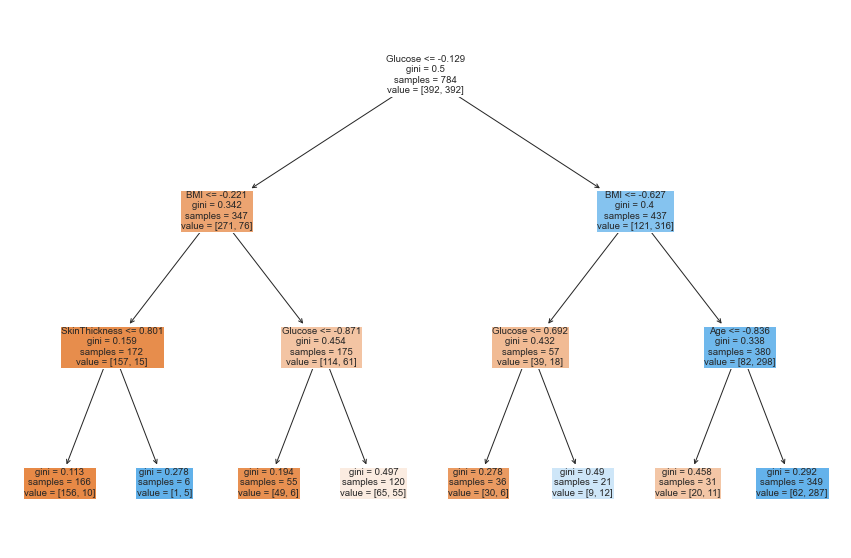

In [84]:
dt_example = DecisionTreeClassifier(max_depth = 3)
dt_example.fit(X, y)
from sklearn.tree import plot_tree
plt.figure(figsize = (15, 10))
plot_tree(dt_example, feature_names = X.columns, filled = True)
plt.show()

In [85]:
# decision tree model maken en alle params voor tuning
dt = DecisionTreeClassifier(random_state=SEED)
criterions = ['gini', 'entropy', 'log_loss']
splitters = ['best', 'random']
depths = [1, 5, 10, 100, None]
samples = [2, 5, 10]

In [87]:
## tunen van het model en best paramaters printen 
grid = dict(criterion = criterions, splitter = splitters, max_depth = depths, min_samples_split = samples)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)
grid_search = GridSearchCV(estimator= dt, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X, y)
print(grid_result.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'splitter': 'best'}


beste parameters zijn dus: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10, 'splitter': 'best'}

In [88]:
dt_tuned = DecisionTreeClassifier(**grid_result.best_params_, random_state=SEED).fit(X,y)

In [89]:
cross_val_score(dt_tuned, X, y, cv=100).mean()

0.7757142857142856

#### Random Forest

Random Forest is een ensemble algoritme voor machine learning dat gebruikt wordt voor zowel classification als regression. Het is een krachtige techniek die de voorspellingen van meerdere Decision Trees combineert om nauwkeurigere en robuustere resultaten te produceren. De term "ensemble" in machine learning verwijst naar de praktijk van het combineren van meerdere modellen om de algemene prestaties te verbeteren. [ChatGPT, 2023, Prompt: Random Forest Explained](https://chat.openai.com/share/a10e42a4-73b4-4a20-a2fe-2ef63e959dc9)

Voorbeeld [foto](https://www.ibm.com/topics/random-forest) van Random Forest

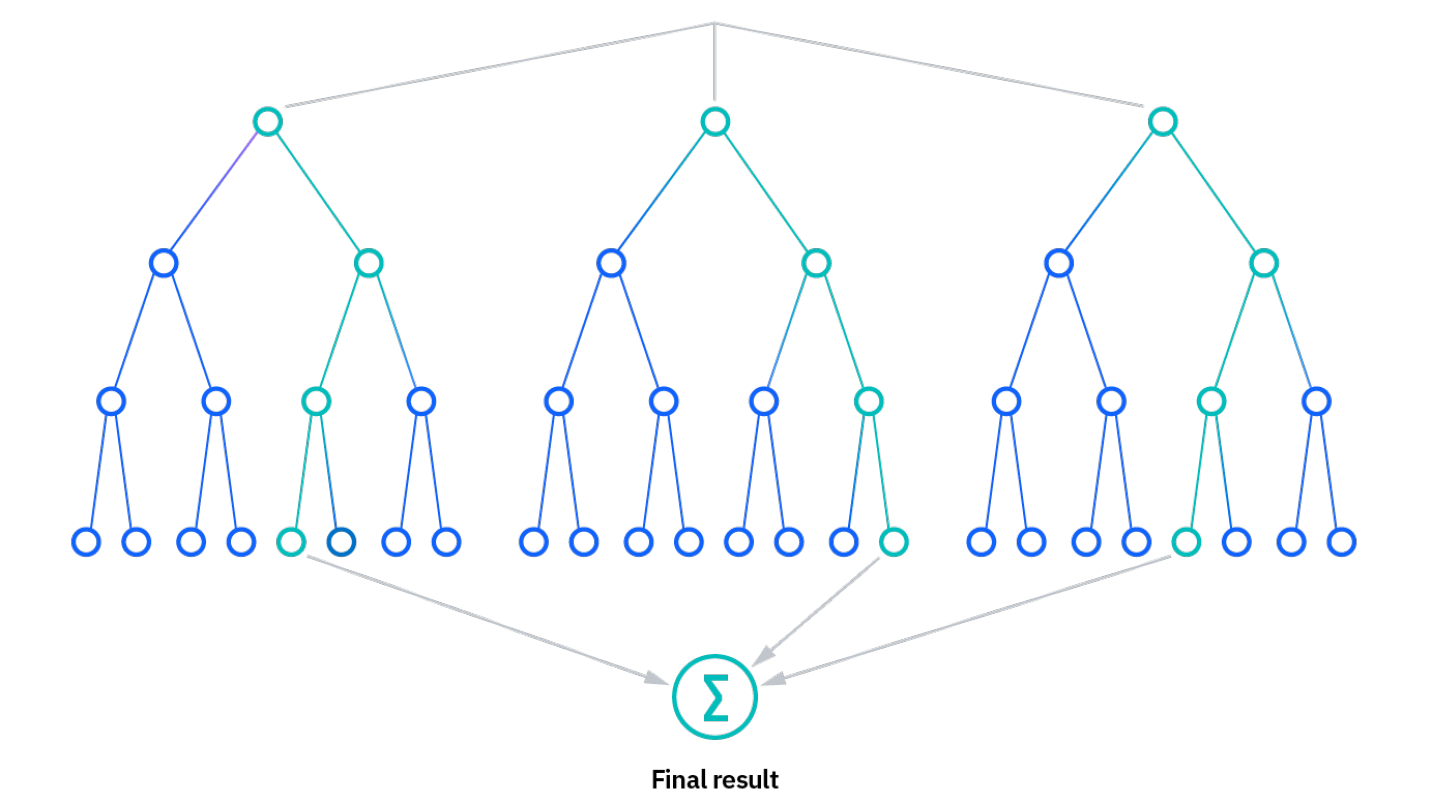

In [90]:
# random forrest model maken en alle params voor tuning
# we kunnen hier bijna dezelfde params gebruiken als decision tree
rf = RandomForestClassifier(random_state=SEED)
criterions = ['gini', 'entropy', 'log_loss']
max_fts = ['sqrt', 'log2', None]
depths = [1, 5, 10, 100, None]
samples = [2, 5, 10]

In [91]:
## tunen van het model en best paramaters printen 
grid = dict(criterion = criterions, max_depth = depths, min_samples_split = samples, max_features = max_fts)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)
grid_search = GridSearchCV(estimator= rf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X, y)
print(grid_result.best_params_)

{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_split': 2}


beste params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2}

In [92]:
rf_tuned = RandomForestClassifier(**grid_result.best_params_, random_state=SEED).fit(X,y)

In [93]:
cross_val_score(rf_tuned, X, y, cv=100).mean()

0.8546428571428573

#### Gradient boosting

Gradient Boosting kan met verschillende modellen werken. Neem Decision Tree als voorbeeld. Gradient Boosting start met 1 Tree (dit is het huidige model), nadien wordt de errors, die resten wordt genoemd, berekend. De nieuwe Tree (weak learner) zal deze errors voorspellen om nieuwe patterns te vinden. De voorspelling van de weak learner wordt dan toegevoegd aan het huidige model, daardoor wordt de voorspelling verbeterd. De bijdrage van elk weak learner wordt gewogen door middel van zijn prestatie. De uiteindelijke voorspelling wordt gemaakt door de voorspellingen van alle weak learners samen te voegen, elk gewogen door zijn prestatie in het verminderen van de residuen. [ChatGPT, 2023, Prompt: Gradient Boosting explained](https://chat.openai.com/share/600a5556-3e15-428f-aecb-d41a8674fddb)

In [94]:
gb = GradientBoostingClassifier(random_state=SEED)
loss_func = ['log_loss', 'exponential']
rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5]
estimators = [1, 2, 5, 10, 100]
crit = ['friedman_mse', 'squared_error']
depths = [1, 5, 10, 100, None]

In [95]:
grid = dict(loss = loss_func, learning_rate = rate, n_estimators = estimators,
             criterion = crit,
            max_depth = depths)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)
grid_search = GridSearchCV(estimator=gb, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X,y)
print(grid_result.best_params_)

{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 10, 'n_estimators': 100}


beste params {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 0.2, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 100, 'subsample': 0.7}

In [96]:
gb_tuned = GradientBoostingClassifier(**grid_result.best_params_, random_state=SEED).fit(X,y)

In [97]:
cross_val_score(rf_tuned, X, y, cv=10).mean()

0.8560532294709511

#### ADA Boosting

Alle training examples krijgen hetzelfde gewicht, daarna worden ze iterated. Bij elke iteratie wordt het gewicht aangepast door de vorige voorspellingen van de weak learners. Verder wordt er getraind op de training data met het huidig gewicht. De weak learner let op de examples die verkeerd geclassificeerd zijn, omdat zij een hogere gewicht krijgen. Nadat de weak learner getraind is, berekent ADA Boost een gewicht op basis van zijn nauwkeurigheid. [ChatGPT, 2023, Prompt: ADA Boosting explained](https://chat.openai.com/share/600a5556-3e15-428f-aecb-d41a8674fddb)

In [98]:
ADA = AdaBoostClassifier(random_state=SEED)
estimators = [1, 2, 5, 10, 100]
rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5]
algo = ['SAMME', 'SAMME.R']

In [99]:
grid = dict(n_estimators = estimators, learning_rate=rate, algorithm=algo)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)
grid_search = GridSearchCV(estimator=ADA, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X,y)
print(grid_result.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}


beste params: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}

In [100]:
ADA_tuned = AdaBoostClassifier(**grid_result.best_params_, random_state=SEED).fit(X,y)

In [101]:
cross_val_score(ADA_tuned, X, y, cv=10).mean()

0.7961213891593639

#### SVM

Bij de SVM is het doel om een beslissingsgrens te vinden die de punten van verschillende klassen in een ruimte scheiden, hierbij wordt de marge gemaximaliseerd. De formule van de beslissingsgrens is w_1 ∗x_1 +w_2 ∗x_2 + …+ w_n*x_n +b=0, zijn de X_i  (i = 1,2,…,n) de relativerende waardes van de variabelen bij de desbetreffende uitkomst variabel en de b_i (i = 1,2,…,n) zijn de logistische coëfficiënten van de desbetreffende variabelen en is b de ‘intercept’. De breedte van de marge wordt berekend doormiddel van de formule: 2/∥w∥. Hierbij is |w| de lengte van de coëfficiënten vector die wordt berekend door: ∣w∣=(w_1)^2 +(w_2)^2 +…+(w_n)^2, dit wordt de Euclidische norm genoemd. Het Support Vector deel van SVM duidt op de punten die het dichtst bij de beslissingsgrens zitten. Bij SVM wordt vaak de ‘kernel trick’ gebruikt, waarbij een kernel een wiskunde functie is die weergeeft hoe erg 2 punten overeenkomen met elkaar. Met de kernel trick zet je een non-lineair probleem om in een lineair probleem, dit doe je via een hoger-dimensionale ruimte. Hierdoor is dan bijvoorbeeld scheiding of regressie mogelijk. Dit wordt gedaan zodat je de data niet echt hoeft te transformeren en dus veel minder reken werk hoeft uit te voeren. De meest gebruikte kernels zijn de Lineaire kernel, de Polynomiale kernel en de Gaussische kernel. Een kernel function wordt aangeduid door K(x, x').  De Lineaire kernel wordt gebruikt bij lineaire problemen en de functie hiervoor is K(x,x′)=(x)^T * x′. De polynomiale kernel wordt gebruikt bij eenvoudige niet lineaire problemen, de functie hierbij is K(x,x′)=((x)^T * x′+c)^d hierbij is c een constante en d de gradient van de polynomiale kernel. As laatste wordt de Gaussische kernel gebruikt bij complexe niet-lineaire problemen en de functie hiervan is K(x,x′)=exp(−((∥x−x′∥)2)/ (2σ^2)) hierbij is σ een parameter die de breedte van de kernel regelt.
(ChatGPT, 2023, prompt 1:SVM)

### Loss functies:

Voor een classificatie probleem is de wiskunde formule: 
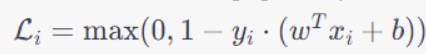


Hierbij is de w de coëfficiëntenvector, b de intercept, x de variabelvector, y de label van het punt (waarbij 1 voor positieve en –1 voor negatieve). Deze loss functie wordt de hinge loss genoemd. Voor regressie problemen wordt de epsilon-insensitive loss gebruikt. De formule hiervan is:

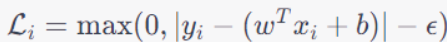

Hierbij zijn de w, x en b hetzelfde soort variabel als bij de hinge loss, alleen is de y de echte waarde van een punt en ϵ is de hoeveel fout dat we accepteren. 
(ChatGPT, 2023, prompt 1:SVM)

### Regularistatie:

Bij SVM gebruiken we weer de L2 en L1 regularisatie. Deze twee vormen doen ook hetzelfde als bij logistische regressie alleen zijn de formules net wat anders, L2 probeert zo dicht mogelijk bij de 0 te komen en L1 kunnen ze ook echt 0 worden. De formule voor de L2 regularisatie is:

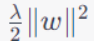

Hierbij is lamba een hyperparameter waarmee je in kan stellen hoe erg je regulariseert en w is weer de coëfficiënt. De breuk in de formule wordt toegevoegd om makkelijker aan het afgeleide te komen voor het optimaliseren. De uiteindelijke loss functie is dan:

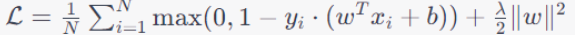

Bij L1 is de functie:

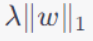

waarbij Lambda en w hetzelfde soort variabel zijn als bij L2. De L1 functie eigenlijk de som van de absolute waarden van de coefficienten. Hierdoor is de uiteindelijke formule: 

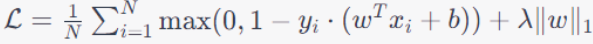

In [102]:
SVM = SVC(random_state=SEED)
c_values = [100, 10, 1.0, 0.1, 0.01]
kernels = ['poly', 'rbf', 'sigmoid']
gammas = ['scale', 'auto']
decision_function = ['ovo', 'ovr']

In [103]:
grid = dict(C=c_values, kernel=kernels, gamma=gammas,
            decision_function_shape=decision_function)
grid_search = GridSearchCV(estimator=SVM, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X,y)
print(grid_result.best_params_)

{'C': 1.0, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}


beste params: {'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'sigmoid'}

In [104]:
SVM_tuned = SVC(**grid_result.best_params_, random_state=SEED, probability=True)

In [105]:
cross_val_score(SVM_tuned, X, y, cv=10).mean()

0.8074975657254138

#### Ensemble

In [106]:
eclf_hard = VotingClassifier(estimators=[('rf', rf_tuned),
                                         ('gb', gb_tuned),
                                         ('svm', SVM_tuned)], voting='hard').fit(X,y)
eclf_soft = VotingClassifier(estimators=[('rf', rf_tuned),
                                         ('gb', gb_tuned),
                                         ('svm', SVM_tuned)], voting='soft').fit(X,y)

In [107]:
hard_score = cross_val_score(eclf_hard, X, y, cv=10).mean()
soft_score = cross_val_score(eclf_soft, X, y, cv=10).mean()
print('Hard score: ', hard_score)
print('Soft score: ', soft_score)

Hard score:  0.8547711781888998
Soft score:  0.8471113274910744


#### model naar keuze:  Gaussian Naive Bayes

**Naive Bayes**  
Naive Bayes-methoden zijn een reeks algoritmen voor supervised learning 
die gebaseerd zijn op het toepassen van de stelling van Bayes met de "naïeve" aanname van voorwaardelijke onafhankelijkheid tussen elk paar kenmerken gegeven de waarde van de klassenvariabele. De stelling van Bayes stelt het volgende verband, gegeven klassenvariabele $y$ en afhankelijke kenmerkvector $x_{1}$ via $x_{n}$:

$$P(y|x_{1},....,x_{n}) = \frac{(P(y)P(x_{1},...,x_{n}|y))} {(P(x_{1},...,x_{n},))}$$

Gebruikmakend van de naïeve veronderstelling van voorwaardelijke onafhankelijheid dat
$$P(x_{i}|y,x_{1}...,x_{i-1}, x_{i+1},....,x_{n}) = P(x_{i}|y),$$

voor alle i, deze relatie is geminimaliseerd tot
$$P(y|x_{1},...,x_{n}) = \frac{(P(y)\Pi_{i=1}^{n})P(x_{i}|y)}{P(x_{1},...,x_{n})}$$

Sinds $P(x_{1},...,x_{n})$ is een constante gegeven de input, kunnen we de volgende classificatie regel gebruiken:

$$P(y|x_{1},...,x_{n}) \propto P(y) \Pi_{i=1}^{n} P(x_{1}|y)$$
<pre>                                                &#8659;</pre>
$$\hat{y} = arg max_{y} P(y)\Pi_{i=1}^{n} P(x_{i}|y),$$

**Gaussian Naive Bayes**  
GaussianNB implementeert het Gaussian Naive Bayes-algoritme voor classificatie. De waarschijnlijkheid van de kenmerken wordt verondersteld Gaussisch te zijn:  

$$ P(x_{i}|y) = \frac{1}{\sqrt{2\pi\sigma^{2}_{y}}}exp\biggl(-\frac{(x_{i}-\mu_{y})^{2}}{2\sigma^{2}_{y}}\biggr)$$  

De parameters $\sigma_{y}$ en $\mu_{y}$ worden geschat met behulp van maximale waarschijnlijkheid.  
[scikit-learn developers,2007 - 2023: Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

Gaussian Naive Bayes is een classificatiemethode die de klasse van een gegevenspunt voorspelt door rekening te houden met de waarschijnlijkheidsverdelingen van de kenmerken. [ChatGPT, 2023, Prompt: Gaussian NB Explained](https://chat.openai.com/share/8a2a38eb-3957-416a-b76b-4fdae749b110)  
Dit gebeurt in drie stappen:

1. Bereken de voorafgaande waarschijnlijkheden voor elke klasse op basis van de trainingsgegevens.
1. De voorwaardelijke waarschijnlijkheid van kenmerkwaarden voor elke klasse schatten met behulp van het gemiddelde en de variantie uit de trainingsgegevens.
1. Gebruik de stelling van Bayes om de posterieure kansen voor elke klasse te berekenen en voor het gegevenspunt de klasse met de hoogste posterieure kans te voorspellen.

Er zijn geen parameters om te tunen bij dit model.

In [108]:
gnm = GaussianNB().fit(X,y)

In [109]:
cross_val_score(gnm, X, y, cv=10).mean()

0.7412690684842584

### prediction

In [110]:
## nul waardes uit de desbetreffende features vervangen met nan
test_df[['Glucose','BloodPressure','SkinThickness','BMI']] = test_df[['Glucose',
                                                                                 'BloodPressure','SkinThickness','BMI']].replace(0, np.NaN)

In [111]:
## alle nans imputen
imputer = KNNImputer(n_neighbors=3, weights='uniform')
imputed = imputer.fit_transform(test_df)
test_df_imp = pd.DataFrame(imputed, columns=test_df.columns)
test_df_imp.head()

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
1,4.0,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
2,13.0,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59.0
3,14.0,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0
4,20.0,3.0,126.0,88.0,41.0,235.0,39.3,0.704,27.0


In [112]:
## standaardiseren van de data
scale = StandardScaler()
scaled_data = scale.fit_transform(test_df_imp[x_cols])
scaled_data_df = pd.DataFrame(scaled_data)
scaled_data_df.head()
test_df_imp['Pregnancies'] = scaled_data_df[0]
test_df_imp['Glucose'] = scaled_data_df[1]
test_df_imp['BloodPressure'] = scaled_data_df[2]
test_df_imp['SkinThickness'] = scaled_data_df[3]
test_df_imp['Insulin'] = scaled_data_df[4]
test_df_imp['BMI'] = scaled_data_df[5]
test_df_imp['DiabetesPedigreeFunction'] = scaled_data_df[6]
test_df_imp['Age'] = scaled_data_df[7]
test_df_imp.head()

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,-0.893792,-1.251669,-0.463760,-0.005659,-0.685277,-0.832356,-0.400743,-0.188144
1,4.0,-1.193018,0.452695,-2.559579,0.676427,0.870214,1.601216,5.309084,-0.012543
2,13.0,-0.893792,2.157060,-0.947411,-0.687745,7.147733,-0.316144,-0.262198,2.270269
3,14.0,0.303112,1.403206,0.019890,-1.142469,0.935026,-0.950348,0.294930,1.567865
4,20.0,-0.295340,0.092157,1.309625,1.358513,1.490559,1.040757,0.639819,-0.539346


In [113]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

test_df["NewBMI"] = NewBMI

test_df.loc[test_df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]

test_df.loc[(test_df["BMI"] > 18.5) & (test_df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
test_df.loc[(test_df["BMI"] > 24.9) & (test_df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
test_df.loc[(test_df["BMI"] > 29.9) & (test_df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
test_df.loc[(test_df["BMI"] > 34.9) & (test_df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
test_df.loc[test_df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [ ]:
test_df["NewInsulinScore"] = test_df.apply(set_insulin, axis=1)

In [ ]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")

test_df["NewGlucose"] = NewGlucose

test_df.loc[test_df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]

test_df.loc[(test_df["Glucose"] > 70) & (test_df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]

test_df.loc[(test_df["Glucose"] > 99) & (test_df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]

test_df.loc[test_df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [ ]:
test_df = pd.get_dummies(test_df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [ ]:
cat_df_test = test_df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [ ]:
p_id = test_df['p_id']
test_df_imp = test_df_imp.drop('p_id', axis=1)

In [ ]:
pred_df = pd.concat([test_df_imp, cat_df_test], axis=1)
pred_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,...,NewInsulinScore_Normal,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Overweight,NewGlucose_Secret,NewGlucose_Secret
0,-0.893792,-1.251669,-0.463760,-0.008369,-0.685277,-0.832356,-0.400743,-0.188144,0.0,0.0,...,0,0,0,0,1,1,0,0,0,0
1,-1.193018,0.452695,-2.559579,0.673975,0.870214,1.601216,5.309084,-0.012543,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
2,-0.893792,2.157060,-0.947411,-0.690713,7.147733,-0.316144,-0.262198,2.270269,1.0,0.0,...,0,0,0,0,0,0,0,0,1,1
3,0.303112,1.403206,0.019890,-1.145609,0.935026,-0.950348,0.294930,1.567865,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
4,-0.295340,0.092157,1.309625,1.356319,1.490559,1.040757,0.639819,-0.539346,0.0,1.0,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
#prediction maken
pred = eclf_hard.predict(test_df_imp)

In [ ]:
pred_df = pd.DataFrame(pred)
p_id_df = pd.DataFrame(p_id)
ans = pd.concat([p_id_df, pred_df], axis=1)
ans = ans.rename(columns = {0: 'p_id', 0: 'Outcome'})
ans.to_csv('Submission.csv', index = False)

## Bevindingen

**Logistic Regression:**
- Parameters:
    - C: 10
    - penalty: l2
    - solver: liblinear
- Score: 0.77
- Kaggle Score: 0.76

**Decision Tree:**
- Parameters:
    - criterion: gini
    - max_depth: 5
    - min_samples_split: 2
    - splitter: random
- Score: 0.75
- Kaggle Score: 0.56

**Random Forest:**
- Parameters:
    - criterion: entropy
    - max_depth: 5
    - max_features: log2
    - min_samples_split: 2
- Score: 0.77
- Kaggle Score: 0.64

**Gradient Boosting:**
- Parameters:
    - criterion: friedman_mse
    - learning_rate: 0.1
    - loss: exponential
    - max_depth: 1
    - max_features: log2
    - min_samples_split: 0.1
    - min_weight_fraction_leaf: 0.1
    - n_estimators: 100
    - subsample: 0.5
- Score: 0.78
- Kaggle Score: 0.63

**ADA Boosting:**
- Parameters:
    - algorithm: SAMME.R
    - learning_rate: 0.1
    - n_estimators: 100
- Score: 0.80
- Kaggle Score: 0.59

**SVM:**
- Parameters:
    - C: 0.1
    - decision_function_shape: ovo
    - gamma: scale
    - kernel: sigmoid
- Score: 0.82
- Kaggle Score: 0.70

**Gaussian Naive Bayes:**
- Parameters:
    Geen
- Score: 0.74
- Kaggle Score: 0.68

Aangezien de scores, geeft SVM de beste score (0.82) aan ons met de parameters:
- C: 0.1
- decision_function_shape: ovo
- gamma: scale
- kernel: sigmoid



## Conclusie en aanbevelingen

# Bronnenlijst:

Logistische regressie - Wikistatistiek. (z.d.). https://wikistatistiek.amc.nl/Logistische_regressie

Slides - Loss, metrics, underfitting, overfitting - V. Radhakrishnan
https://brightspace.hhs.nl/content/enforced/56591-ADSAI-MACHI-23_2023_VT/Lecture%20-%20Loss,%20metrics,%20over%20&%20underfitting.pdf?_&d2lSessionVal=8tkyX7htqHec8sZqio6Ej8nmT

StatQuest with Josh Starmer. (2019, 5 februari). Gradient descent, Step-by-Step [Video]. YouTube. https://www.youtube.com/watch?v=sDv4f4s2SB8

Akalin, A. (2020, 30 september). 5.13 Logistic Regression and Regularization | Computational Genomics with R. https://compgenomr.github.io/book/logistic-regression-and-regularization.html

ChatGPT. (2023). Prompt 1: SVM. ChatGPT. https://chat.openai.com/share/1e5d05d3-8578-4807-85c0-44c3edc334bd